In [62]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from ConsLaborPortfolioModel import LaborPortfolioConsumerType
from HARK.utilities import plot_funcs

In [63]:
agent = LaborPortfolioConsumerType()
agent.cycles = 10

In [64]:
def plot_3d_func(func, lims_x, lims_y, n=100):
    # get_ipython().run_line_magic("matplotlib", "widget")
    xmin, xmax = lims_x
    ymin, ymax = lims_y
    xgrid = np.linspace(xmin, xmax, n)
    ygrid = np.linspace(ymin, ymax, n)

    xMat, yMat = np.meshgrid(xgrid, ygrid, indexing="ij")

    zMat = func(xMat, yMat)

    ax = plt.axes(projection="3d")
    ax.plot_surface(xMat, yMat, zMat, cmap="viridis")
    ax.set_title("surface")
    ax.set_xlabel(r"$\theta$")
    ax.set_ylabel("b")
    ax.set_zlabel("f")
    plt.show()

In [65]:
consumption_stage = agent.solution_terminal.consumption_stage

In [66]:
consumption_stage

ConsumptionStage(c_func=<function LaborPortfolioConsumerType.update_solution_terminal.<locals>.<lambda> at 0x000001B6222AFB50>, v_func=<HARK.rewards.UtilityFuncCRRA object at 0x000001B624CBB880>, vp_func=<bound method UtilityFunction.der of <HARK.rewards.UtilityFuncCRRA object at 0x000001B624CBB880>>, mNrmMin=0.0)

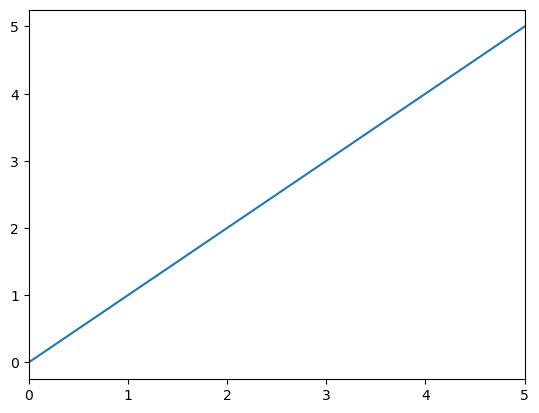

In [67]:
plot_funcs(consumption_stage.c_func, 0, 5)

In [68]:
agent.solve()

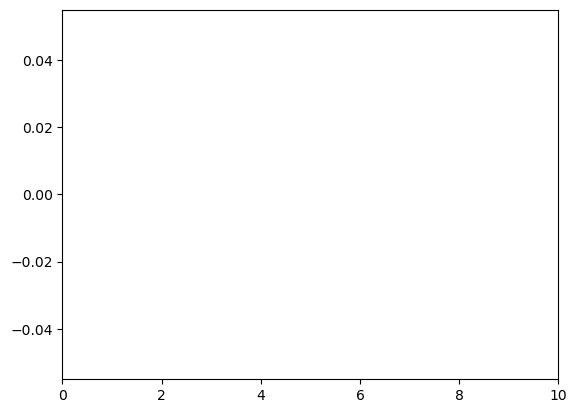

In [69]:
plot_funcs(agent.solution[0].portfolio_stage.share_func, 0, 10)

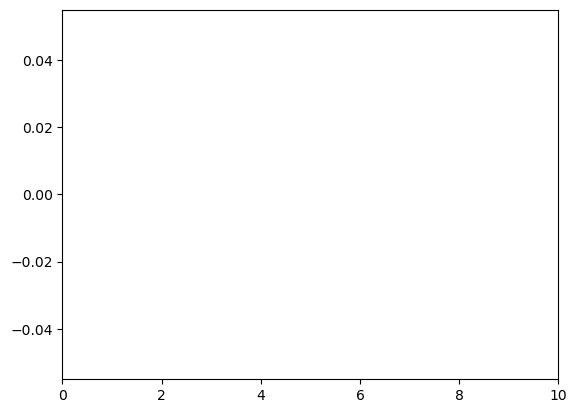

In [70]:
plot_funcs(agent.solution[0].consumption_stage.c_func, 0, 10)

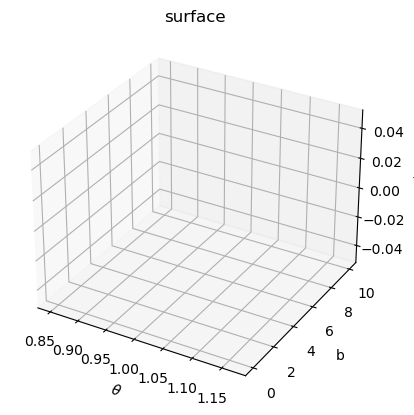

In [71]:
plot_3d_func(
    agent.solution[0].labor_stage.labor_func,
    [min(agent.TranShkGrid), max(agent.TranShkGrid)],
    [0, 10],
)

In [72]:
grids = agent.solution[0].labor_stage.grids

Text(0.5, 0, 'f')

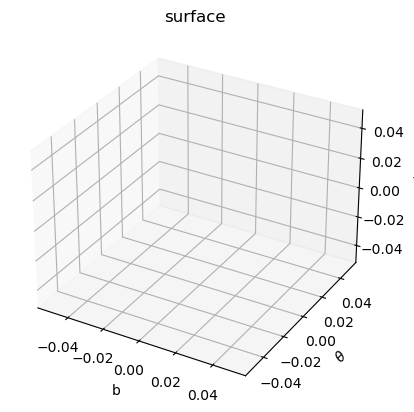

In [73]:
ax = plt.axes(projection="3d")
ax.plot_surface(grids["bNrm"], grids["tShk"], grids["leisure"], cmap="viridis")
ax.set_title("surface")
ax.set_xlabel("b")
ax.set_ylabel(r"$\theta$")
ax.set_zlabel("f")

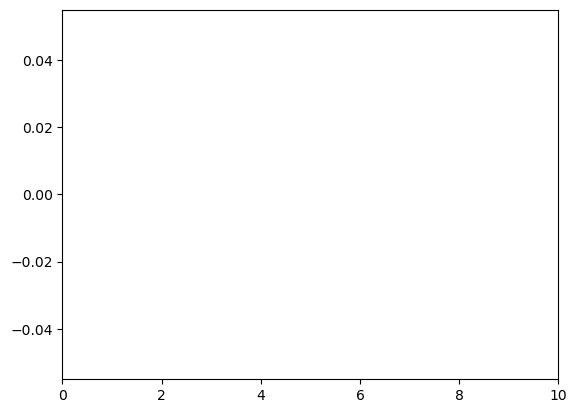

In [74]:
plot_funcs(agent.solution[0].labor_stage.labor_func.xInterpolators, 0, 10)

201 201 201
201 201 201
201 201 201
201 201 201
201 201 201
201 201 201
201 201 201


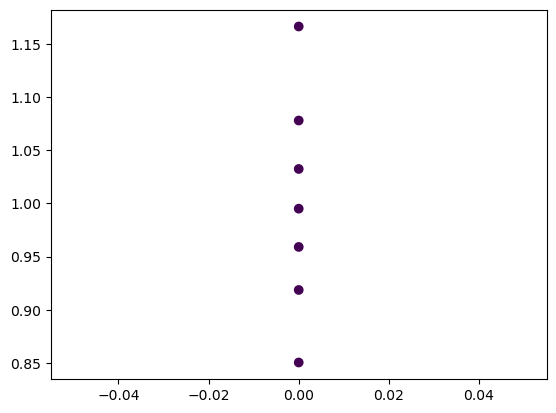

In [75]:
xInterps = agent.solution[0].labor_stage.labor_func.xInterpolators
y = agent.TranShkGrid[0]

for i in range(len(xInterps)):
    x_list = np.array(xInterps[i].x_list).ravel()
    c_list = np.array(xInterps[i].y_list).ravel()
    y_list = np.array([y[i]] * len(x_list)).ravel()
    print(len(x_list), len(y_list), len(c_list))
    plt.scatter(x_list, y_list, c=c_list, cmap="viridis")